<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.python4engineer/blob/main/Bai_du_doan_dung_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

### Clear Warning
import warnings; 
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import cufflinks as cf

from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error



In [ ]:
# lấy dữ liệu từ link github
dataf = pd.read_csv('https://raw.githubusercontent.com/nguyenvudev20/mse22.python4engineer/main/train.csv')

In [ ]:
dataf['Postal Code'] = dataf['Postal Code'].fillna('700000')
dataf['Order Date'] = pd.to_datetime(dataf['Order Date'],format='%d/%m/%Y')
dataf['Ship Date'] = pd.to_datetime(dataf['Ship Date'],format='%d/%m/%Y')

In [ ]:
dataf.sort_values(by=['Order Date'],inplace=True)

In [ ]:
dataf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


In [ ]:
dataf.sort_values(by=['Order Date'], inplace=True, ascending=True)
dataf.set_index("Order Date", inplace = True)
dataf

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2015-01-03,7981,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,742,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,741,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,740,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,1760,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,908,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
2018-12-30,1298,CA-2018-115427,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
2018-12-30,907,CA-2018-143259,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136


In [ ]:
# tạo mới dữ liệu theo Sales và chuổi ngày
new_data = pd.DataFrame(dataf['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,90.930
2018-12-30,20.720
2018-12-30,323.136


In [ ]:
new_data = pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data

,Sales
Order Date,
2015-01-03,16.448000
2015-01-04,96.020000
2015-01-05,19.536000
2015-01-06,489.677778
2015-01-07,43.579000
...,...
2018-12-26,203.648500
2018-12-27,88.818000
2018-12-28,87.228989


In [ ]:
# thực hiện nội suy các giá trị còn thiếu
new_data = new_data.interpolate(method='linear') 
new_data

,Sales
Order Date,
2015-01-03,16.448000
2015-01-04,96.020000
2015-01-05,19.536000
2015-01-06,489.677778
2015-01-07,43.579000
...,...
2018-12-26,203.648500
2018-12-27,88.818000
2018-12-28,87.228989


In [ ]:
data=new_data.values
df_train=data[:1400]
df_test=data[1400:]

In [ ]:
data

array([[ 16.448     ],
       [ 96.02      ],
       [ 19.536     ],
       ...,
       [ 87.22898947],
       [242.96116667],
       [101.97      ]])

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [ ]:
x_train,y_train=[],[]
for i in range(50,len(df_train)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])


In [ ]:
#x_train

In [ ]:
#y_train

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
model=Sequential();
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
save_model='du_bao_doanh_so.hdf5'
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.03574, saving model to du_bao_doanh_so.hdf5
27/27 - 6s - loss: 0.0357 - 6s/epoch - 230ms/step
Epoch 2/100

Epoch 2: loss improved from 0.03574 to 0.03318, saving model to du_bao_doanh_so.hdf5
27/27 - 3s - loss: 0.0332 - 3s/epoch - 107ms/step
Epoch 3/100

Epoch 3: loss did not improve from 0.03318
27/27 - 3s - loss: 0.0336 - 3s/epoch - 126ms/step
Epoch 4/100

Epoch 4: loss improved from 0.03318 to 0.03306, saving model to du_bao_doanh_so.hdf5
27/27 - 3s - loss: 0.0331 - 3s/epoch - 106ms/step
Epoch 5/100

Epoch 5: loss improved from 0.03306 to 0.03299, saving model to du_bao_doanh_so.hdf5
27/27 - 4s - loss: 0.0330 - 4s/epoch - 152ms/step
Epoch 6/100

Epoch 6: loss did not improve from 0.03299
27/27 - 3s - loss: 0.0331 - 3s/epoch - 107ms/step
Epoch 7/100

Epoch 7: loss improved from 0.03299 to 0.03286, saving model to du_bao_doanh_so.hdf5
27/27 - 3s - loss: 0.0329 - 3s/epoch - 107ms/step
Epoch 8/100

Epoch 8: loss improved from 0.03286 to 

In [ ]:
y_train=sc.inverse_transform(y_train)
final_model=load_model('du_bao_doanh_so.hdf5')
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict)

43/43 [==============================] - 2s 28ms/step


In [ ]:
test=new_data[len(df_train)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)
x_test=[]
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test=new_data[1400:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

2/2 [==============================] - 0s 35ms/step


In [ ]:
y_train_predict

array([[135.39229],
       [135.23698],
       [134.58302],
       ...,
       [142.71968],
       [146.71402],
       [192.84367]], dtype=float32)

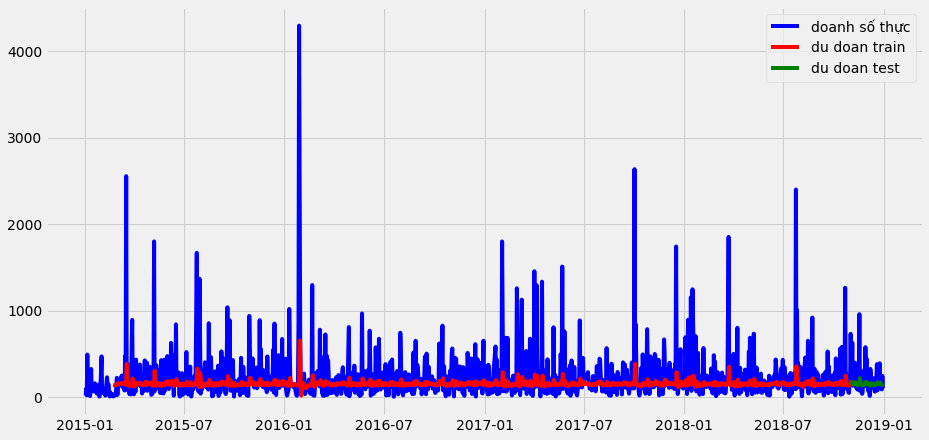

In [ ]:
train_data=new_data[50:1400]
test_data=new_data[1400:]


train_data['du doan']=y_train_predict
test_data['du doan']=y_test_predict;
#train_data

plt.figure(figsize=(14,7))
plt.plot(new_data,label='doanh số thực',color='b')
plt.plot(train_data['du doan'],label='du doan train',color='red')
plt.plot(test_data['du doan'],label='du doan test',color='green')
plt.legend()
plt.show()

In [ ]:
test_data

,Sales,du doan
Order Date,,
2018-11-03,197.258130,173.521576
2018-11-04,627.535059,148.359665
2018-11-05,130.836889,176.369736
2018-11-06,158.842593,154.825027
2018-11-07,241.337800,142.230270
2018-11-08,192.050000,147.744293
2018-11-09,395.957667,149.886642
2018-11-10,267.169867,166.867767
2018-11-11,121.014533,163.572113
